In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

<H3>Load relaxations, chemical shifts and predicted secondary structures</H3>

In [2]:
BMBR_path="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/"
PPSpred_path="../04_predict_2str_PSSpred/data/"

experiments=BMBR.load_BMBR(BMBR_path)
secondary_structure=BMBR.load_PSSpred_structure(PPSpred_path)

4697 .


<H4>Sort IDs according to predicted disordered part</H4>

In [3]:
disordered={}
for experiment in secondary_structure:
    procentage=secondary_structure[experiment]["codes"].count(0)/len(secondary_structure[experiment]["codes"])
    disordered[experiment]=procentage

sorted_by_disordered=sorted(disordered, key=lambda protein: disordered[protein], reverse=True)

30834


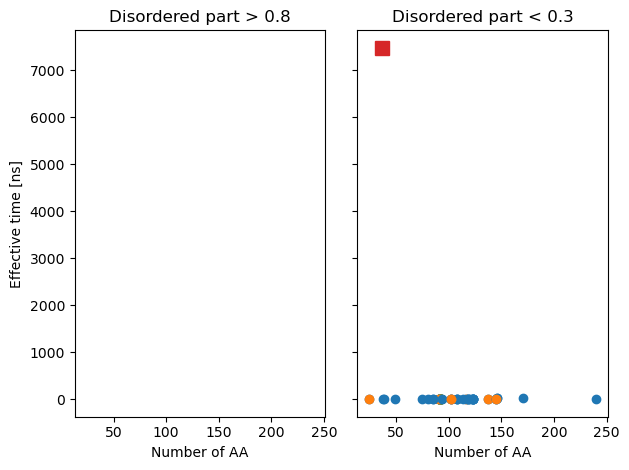

In [4]:
fig,ax=plt.subplots(1,2,sharey=True,sharex=True)
plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})
fig.patch.set_facecolor('xkcd:white')


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
                        

                
    if disordered[entry]>0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="50553" or entry=="16482":
                     ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    elif not disordered[entry]>0.8:
        break

ax[0].set_title("Disordered part > 0.8")
ax[0].set_xlabel("Number of AA")
ax[0].set_ylabel("Effective time [ns]")


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="30834" or entry=="15930" or entry=="26788":
                     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

ax[1].set_title("Disordered part < 0.3")
ax[1].set_xlabel("Number of AA")
plt.savefig("length_vs_time03.png")

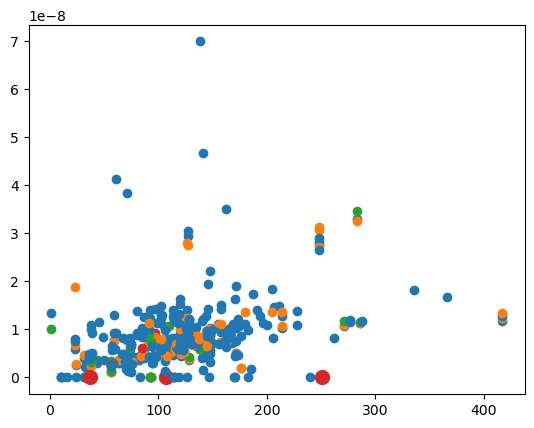

In [35]:
for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes),"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="30834" or entry=="15930" or entry=="26788":
                     plt.plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes),"o",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

Text(0.5, 0, 'Number of AA')

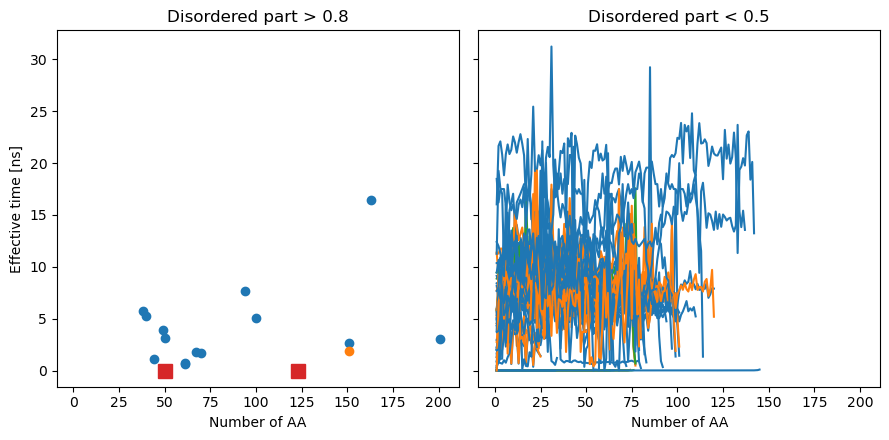

In [55]:
fig,ax=plt.subplots(1,2,sharey=True,sharex=True)
plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})
fig.patch.set_facecolor('xkcd:white')


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]>0.8 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"o",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                if entry=="50553" or entry=="16482":
                     ax[0].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    elif not disordered[entry]>0.8:
        break

ax[0].set_title("Disordered part > 0.8")
ax[0].set_xlabel("Number of AA")
ax[0].set_ylabel("Effective time [ns]")


for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                ax[1].plot(residues,np.array(effTimes)*10**9,"-",c="C"+str(i))
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass
    

ax[1].set_title("Disordered part < 0.5")
ax[1].set_xlabel("Number of AA")
#plt.savefig("length_vs_time.png")

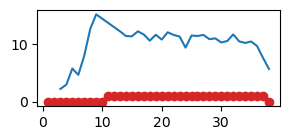

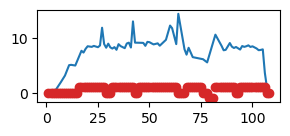

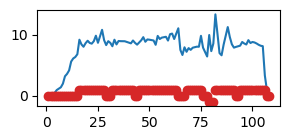

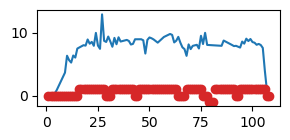

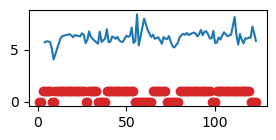

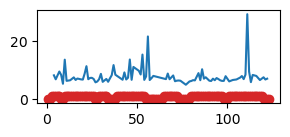

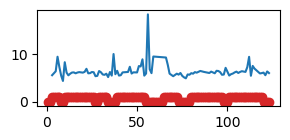

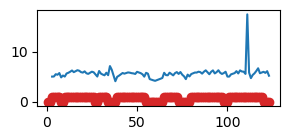

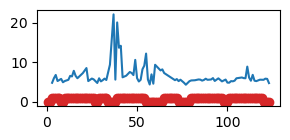

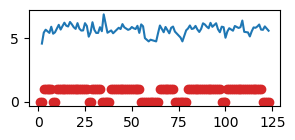

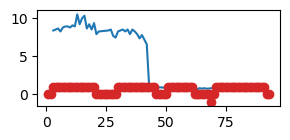

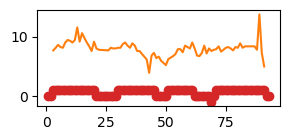

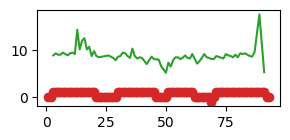

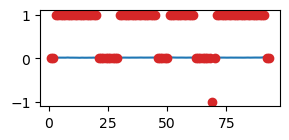

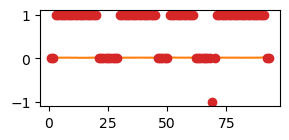

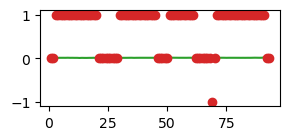

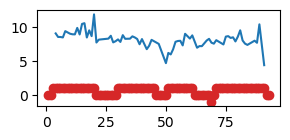

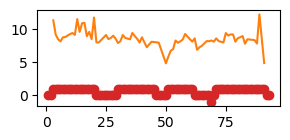

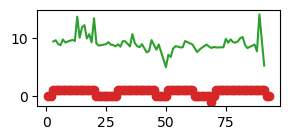

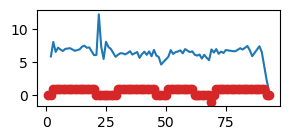

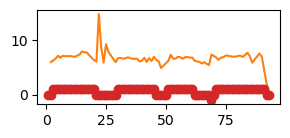

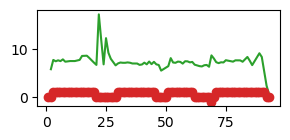

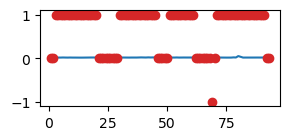

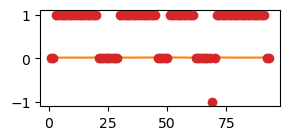

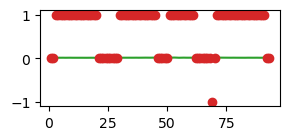

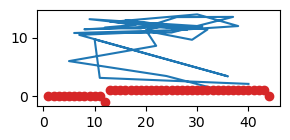

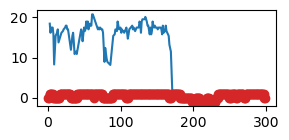

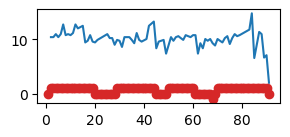

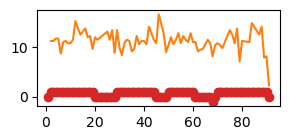

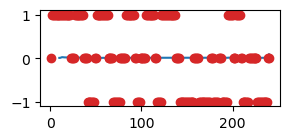

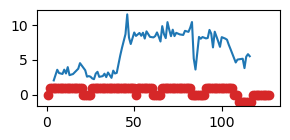

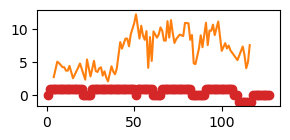

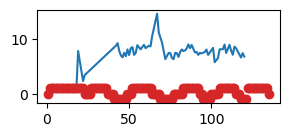

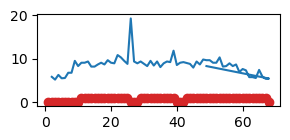

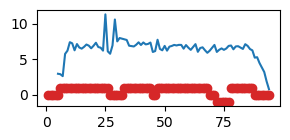

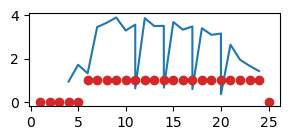

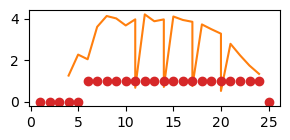

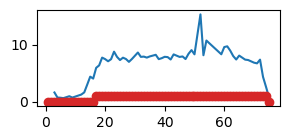

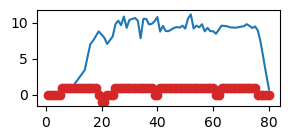

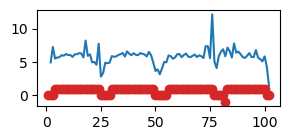

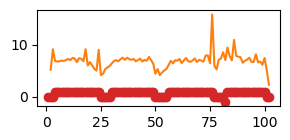

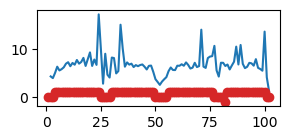

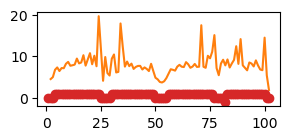

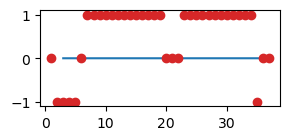

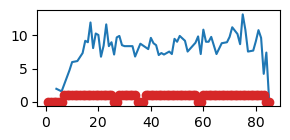

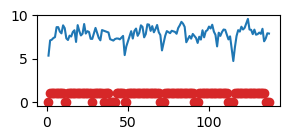

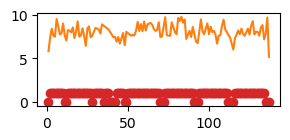

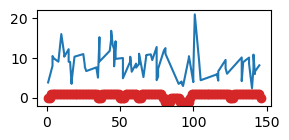

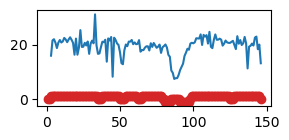

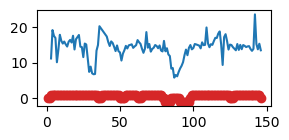

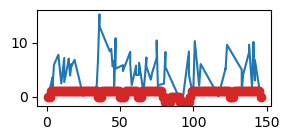

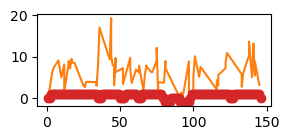

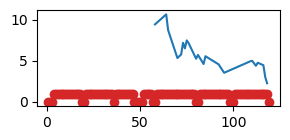

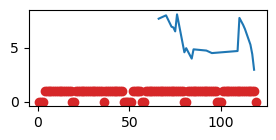

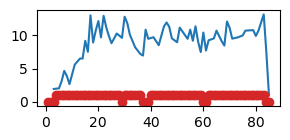

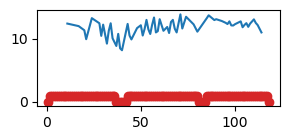

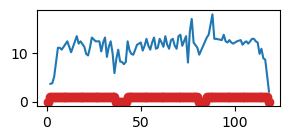

In [62]:
plt.rcParams["figure.figsize"] = [3, 1.5]
for entry in sorted_by_disordered:
    plot_secondary=False
    with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
        for line in f:
            if "_Entity.Polymer_type" in line:
                if len(line.split())>1:
                    if "polypeptide" in line.split()[1]:
                        plot_secondary=True
    if disordered[entry]<0.3 and plot_secondary:
        i=0
        for field in experiments[entry]:
            try:
                effTimes=[]
                for R2 in experiments[entry][field]["results"]["R2"]:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                plt.plot(experiments[entry][field]["results"]["atomID"],np.array(effTimes)*10**9,"-",c="C"+str(i))
                plt.plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                plt.show()
                if np.mean(effTimes)>2.0*10**(-7):
                    print(entry)
                #if entry=="30834" or entry=="15930" or entry=="26788":
                #     ax[1].plot(experiments[entry][field]["results"]["atomID"][-1],np.mean(effTimes)*10**9,"s",c="C3",markersize=10)
                i+=1
            except Exception as e:
                pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

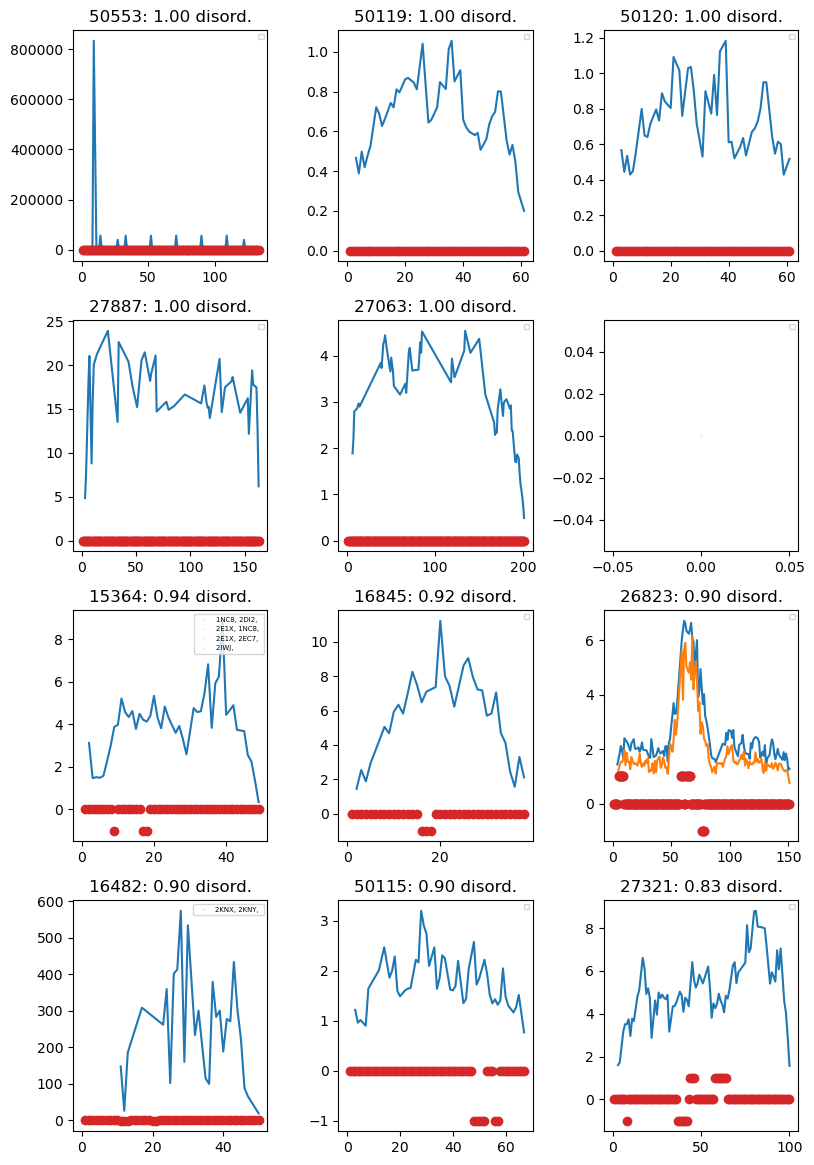

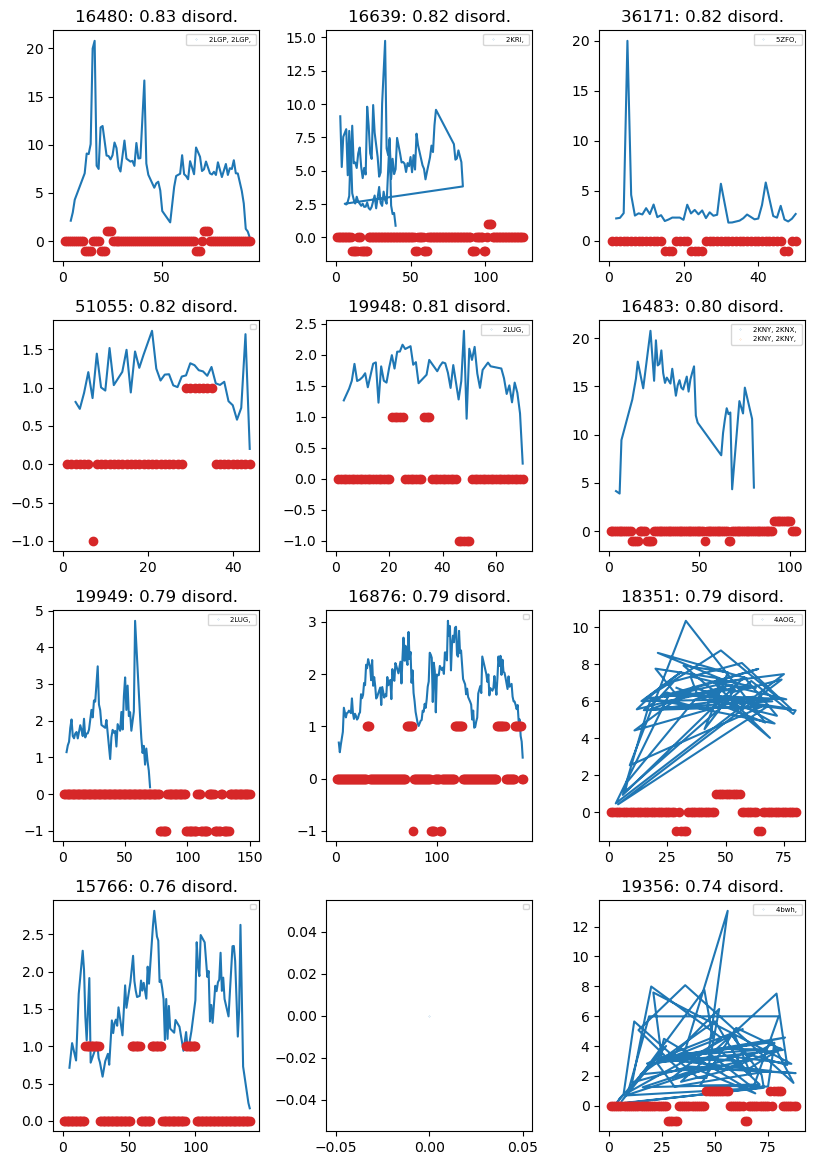

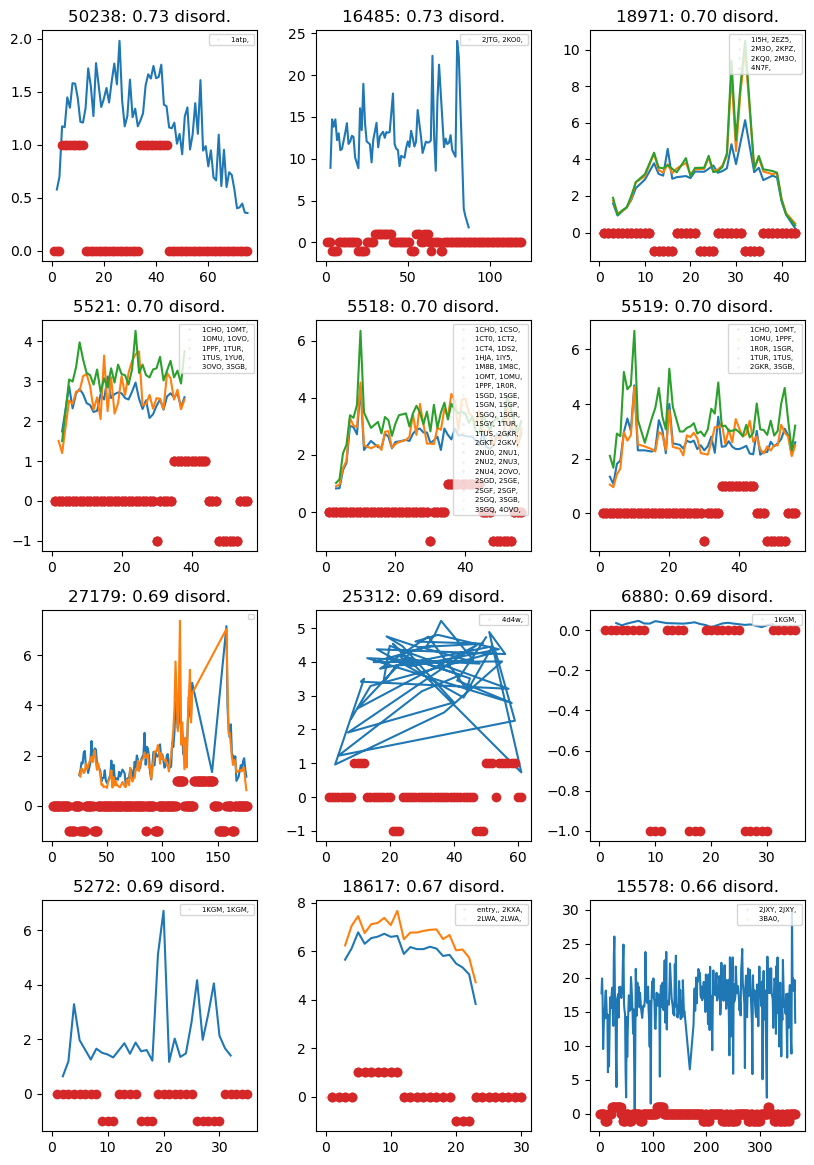

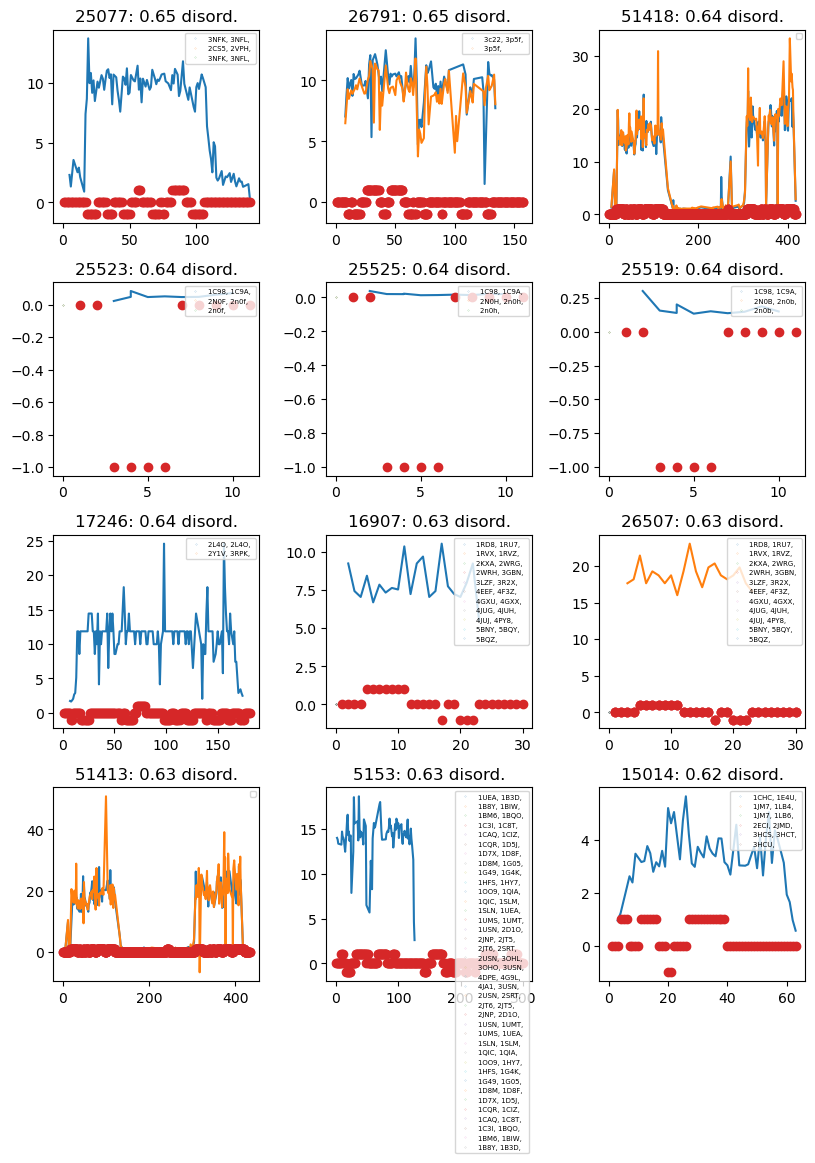

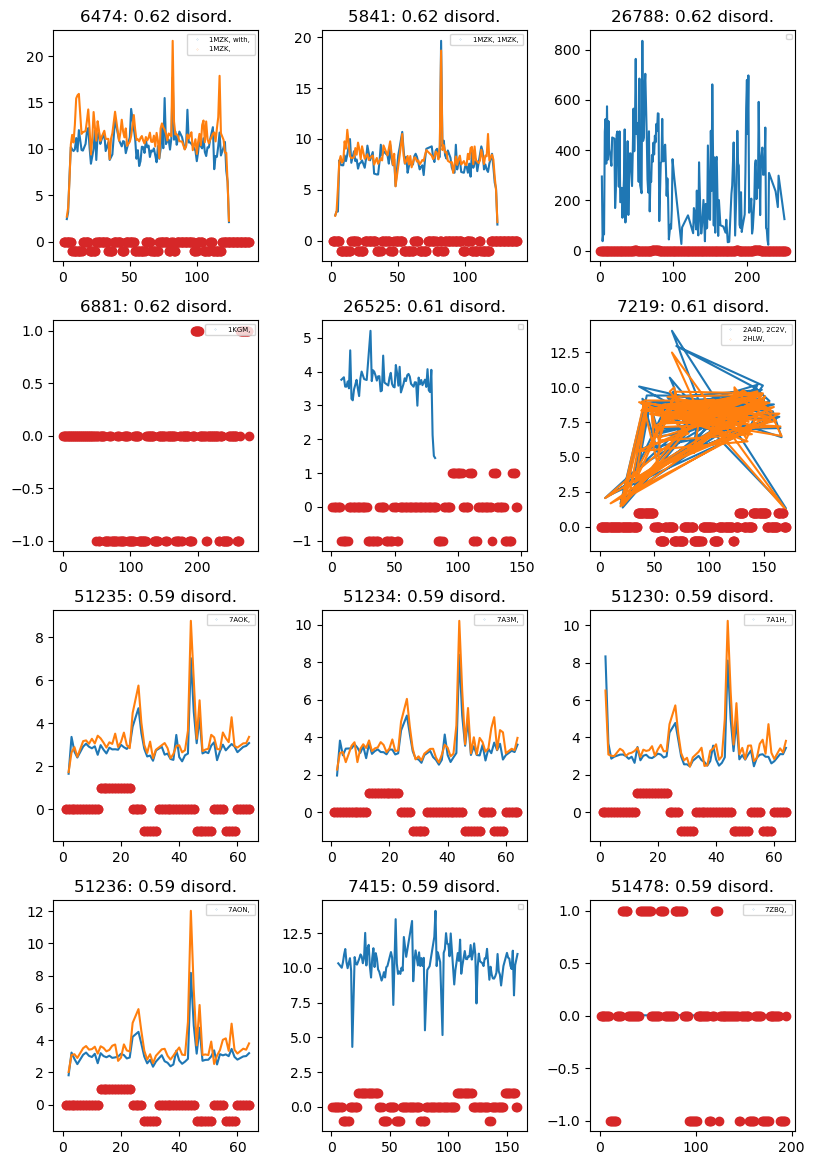

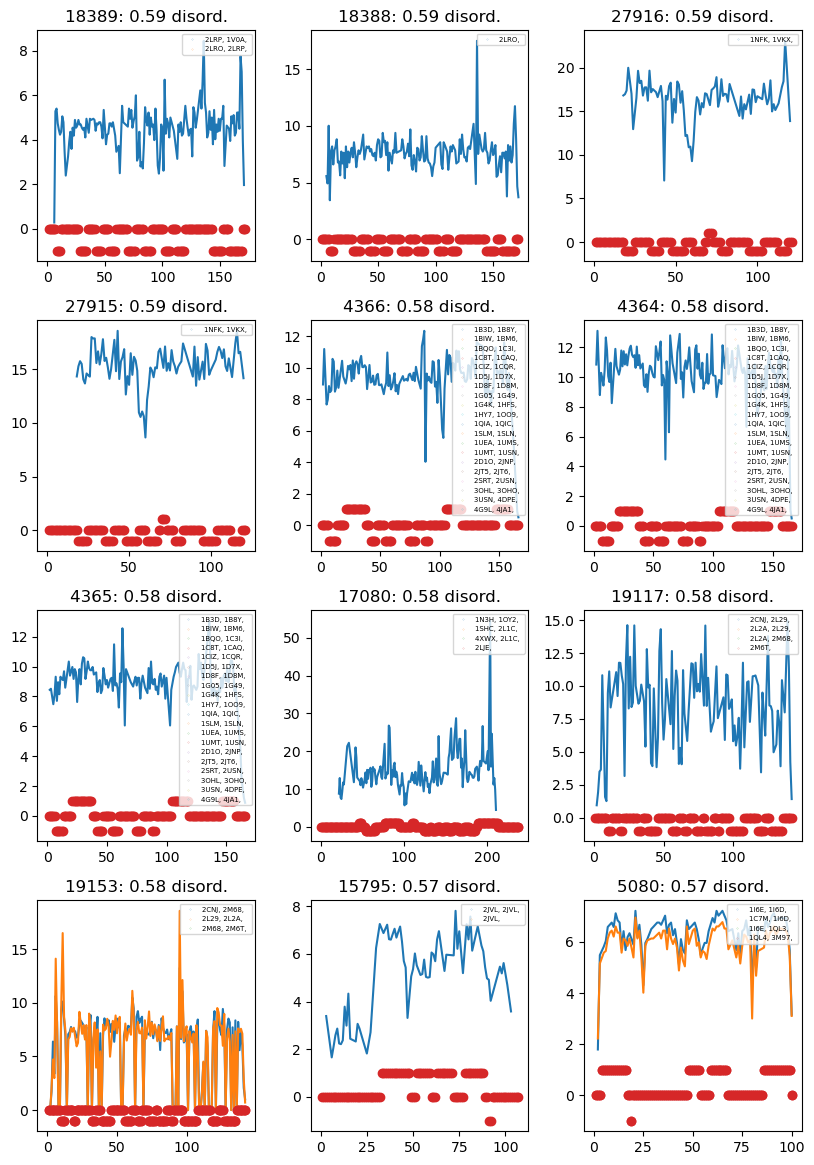

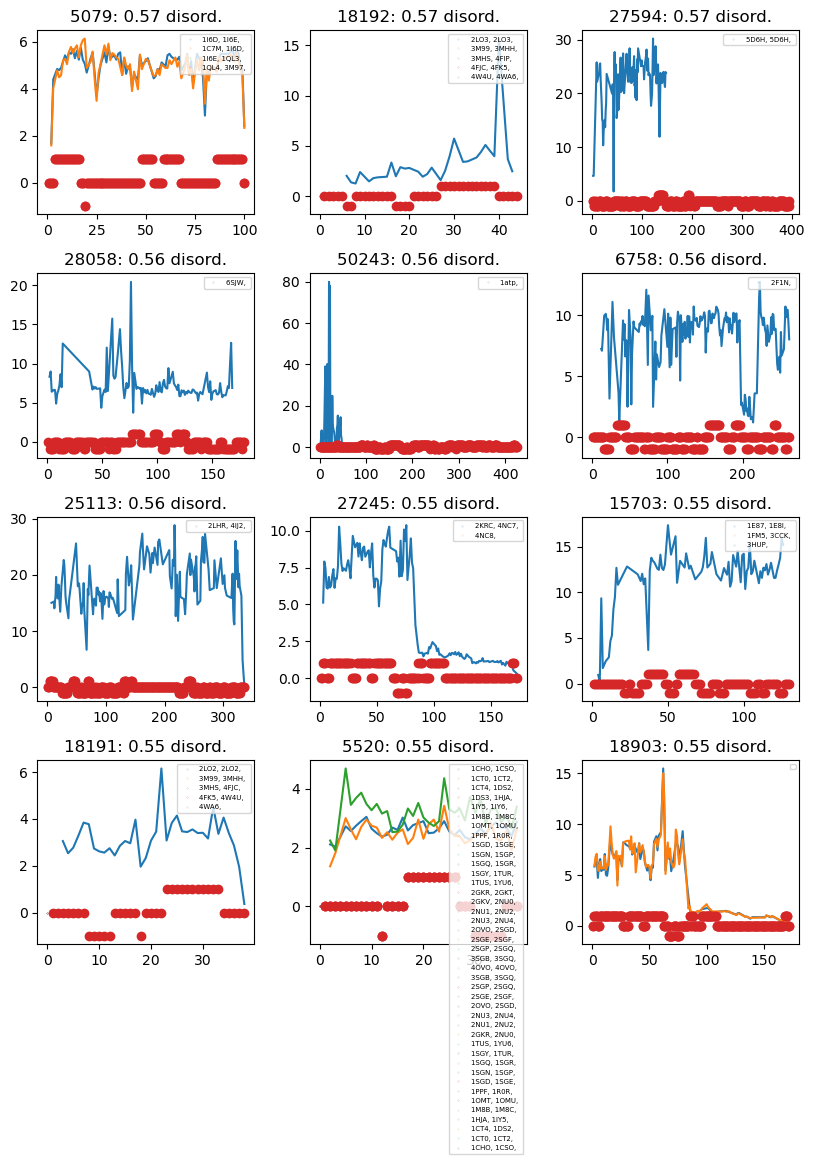

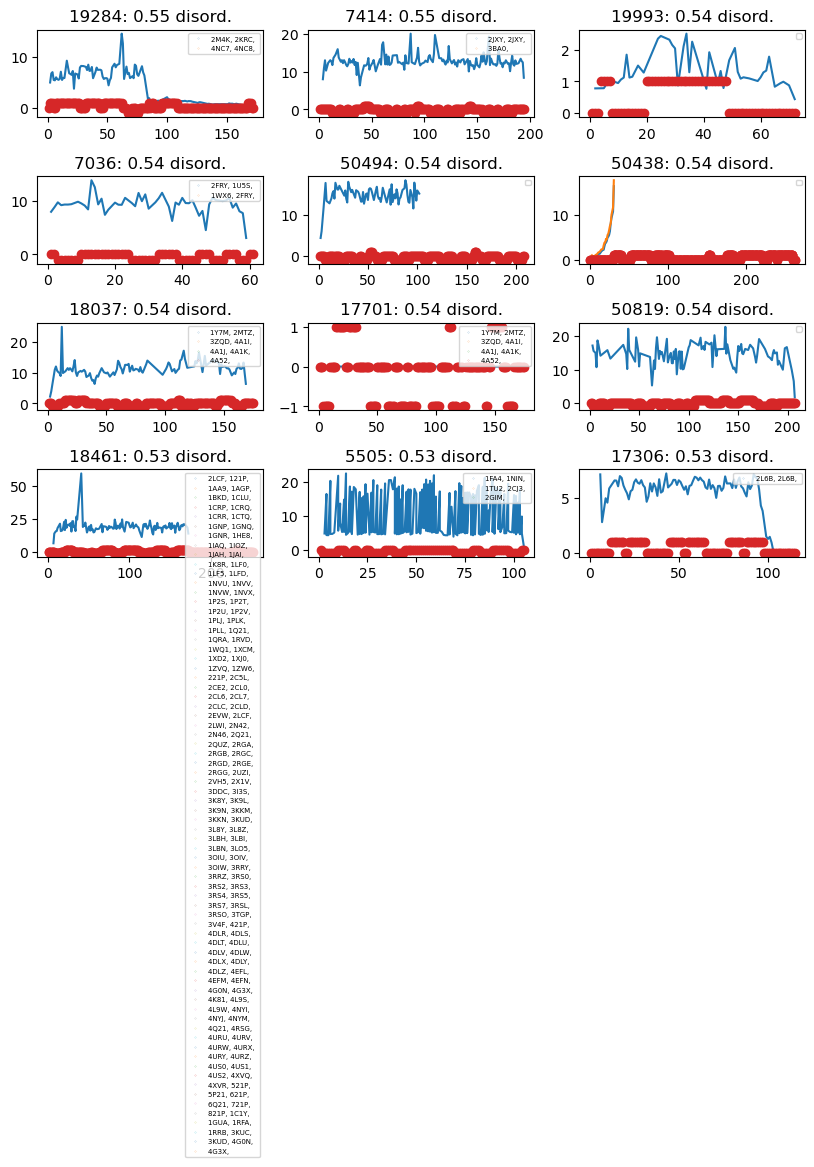

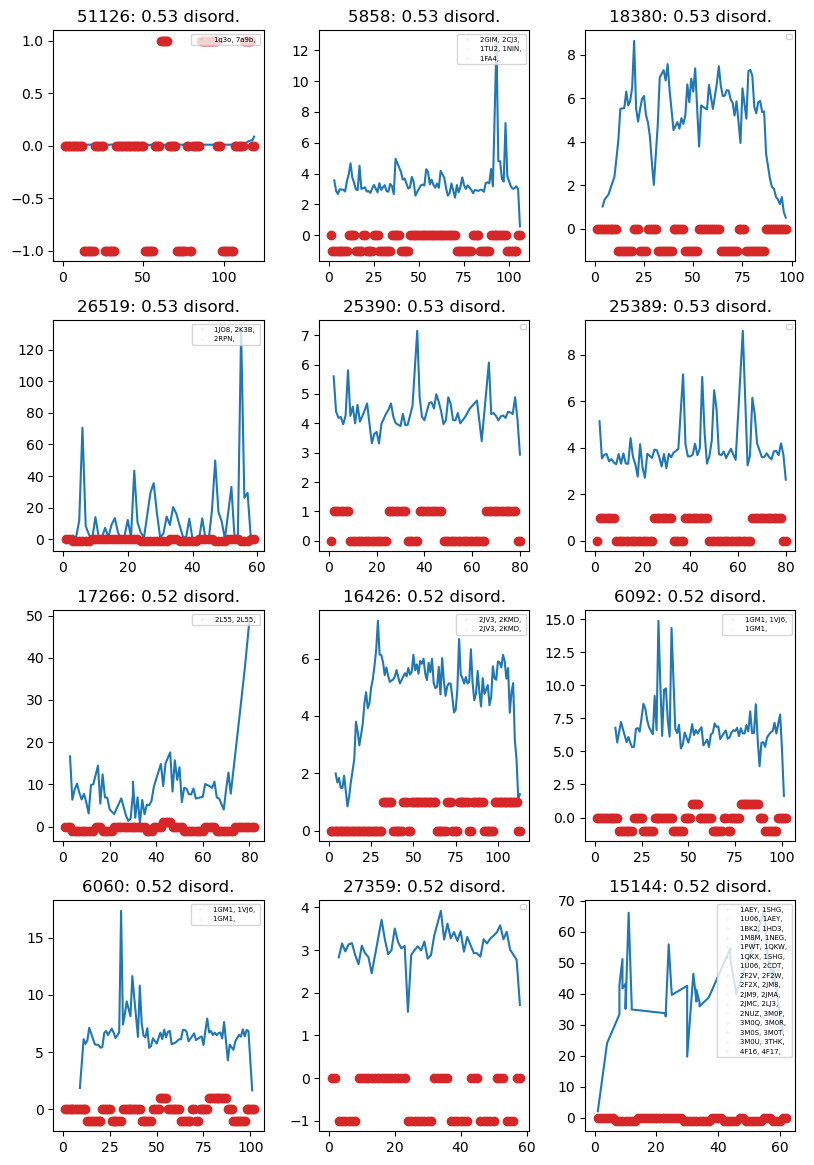

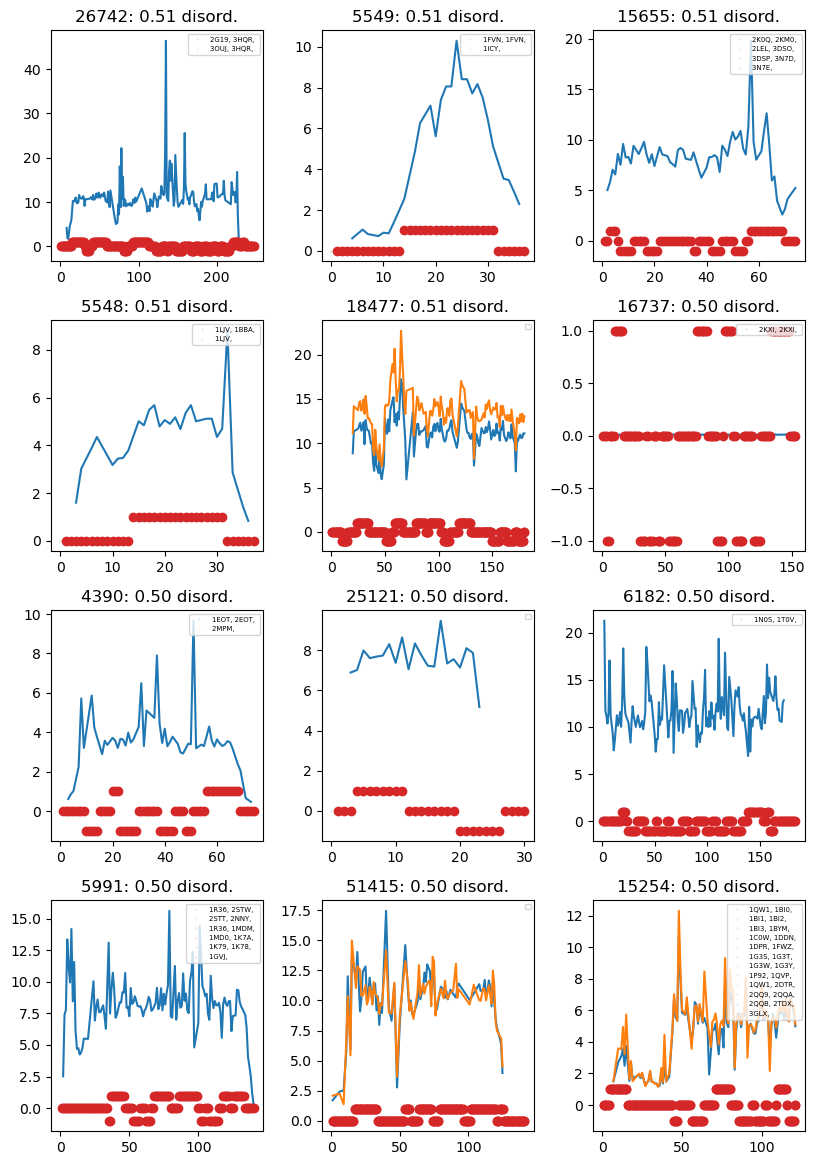

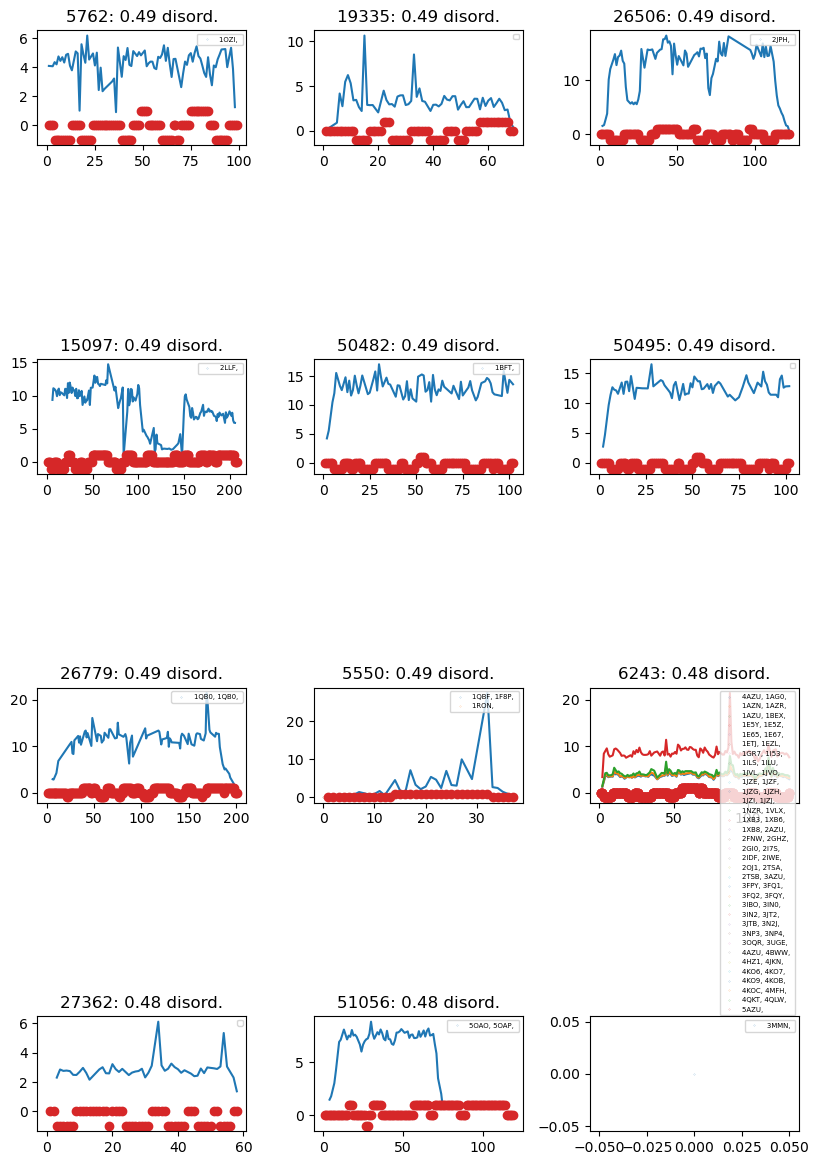

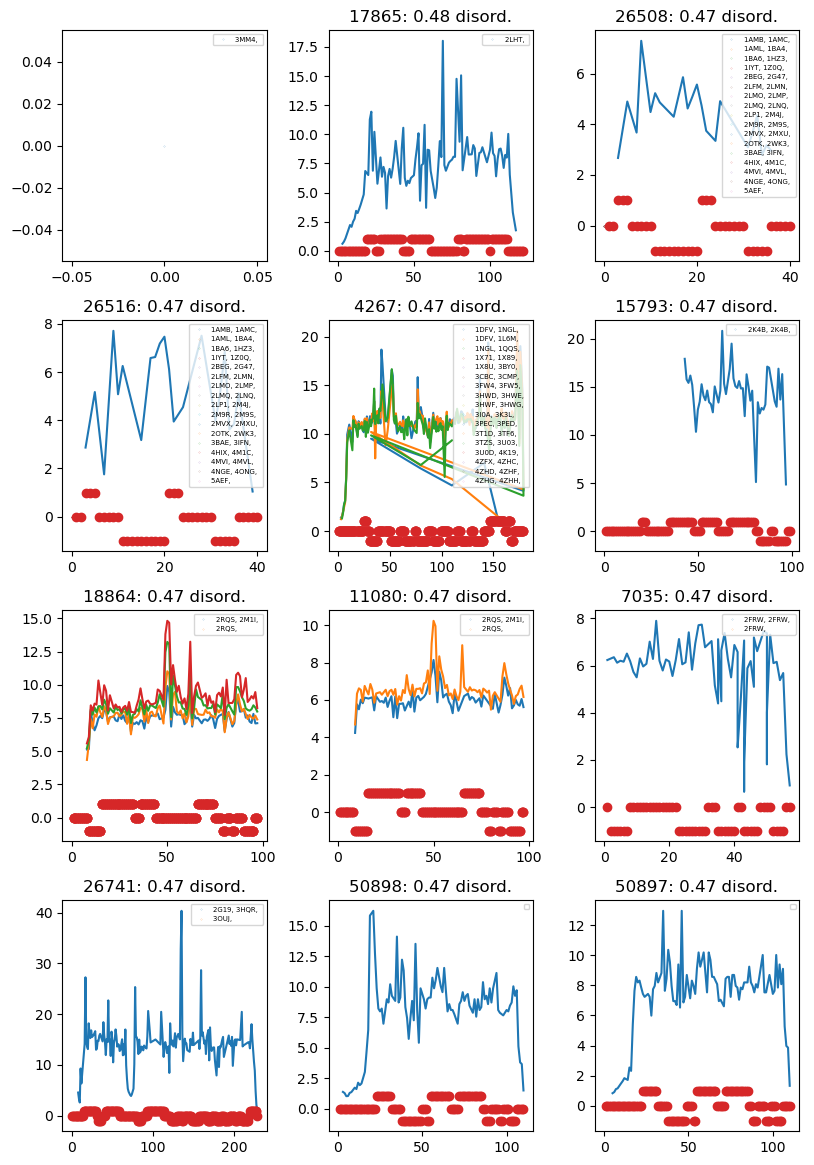

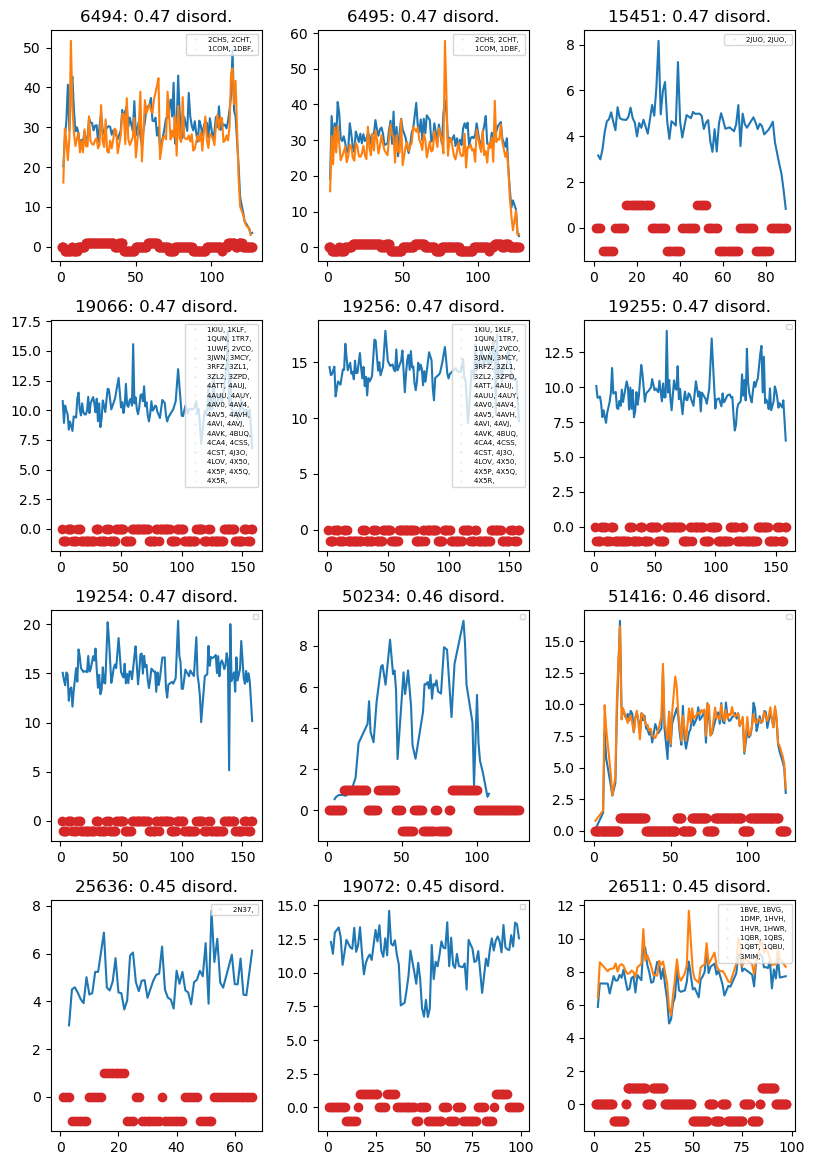

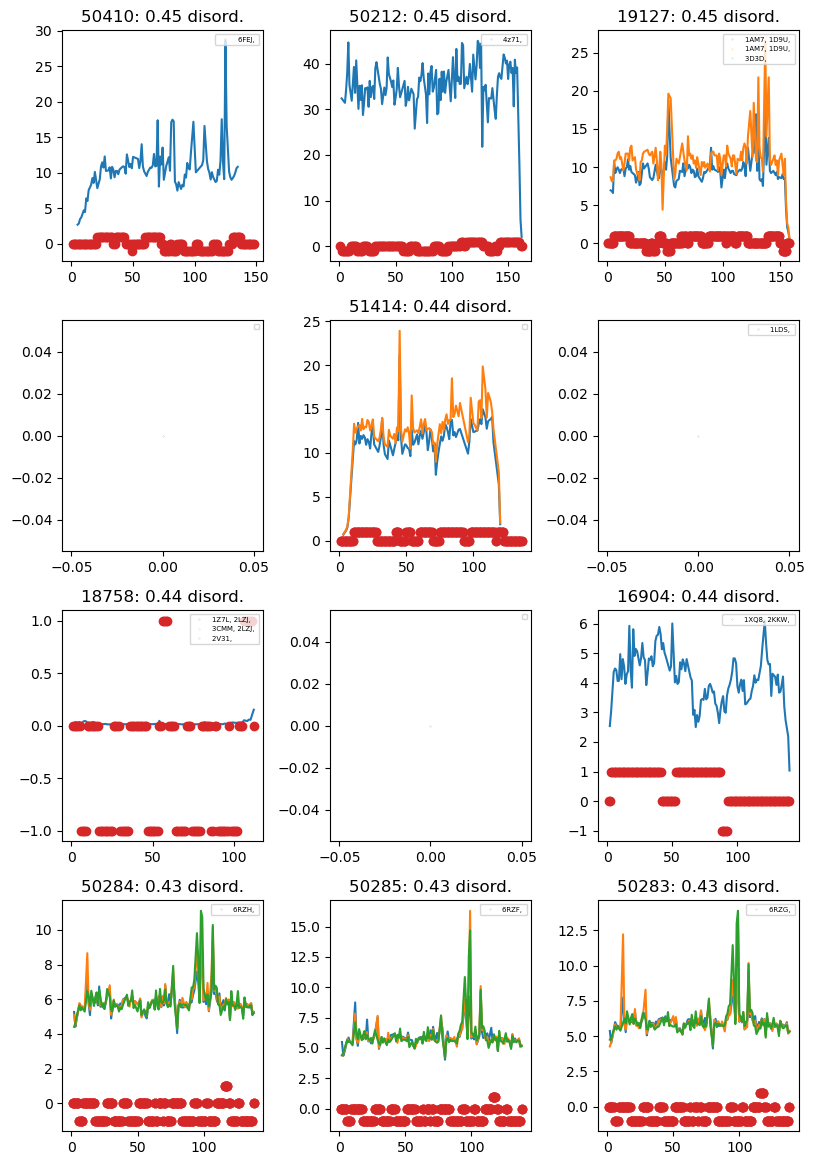

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


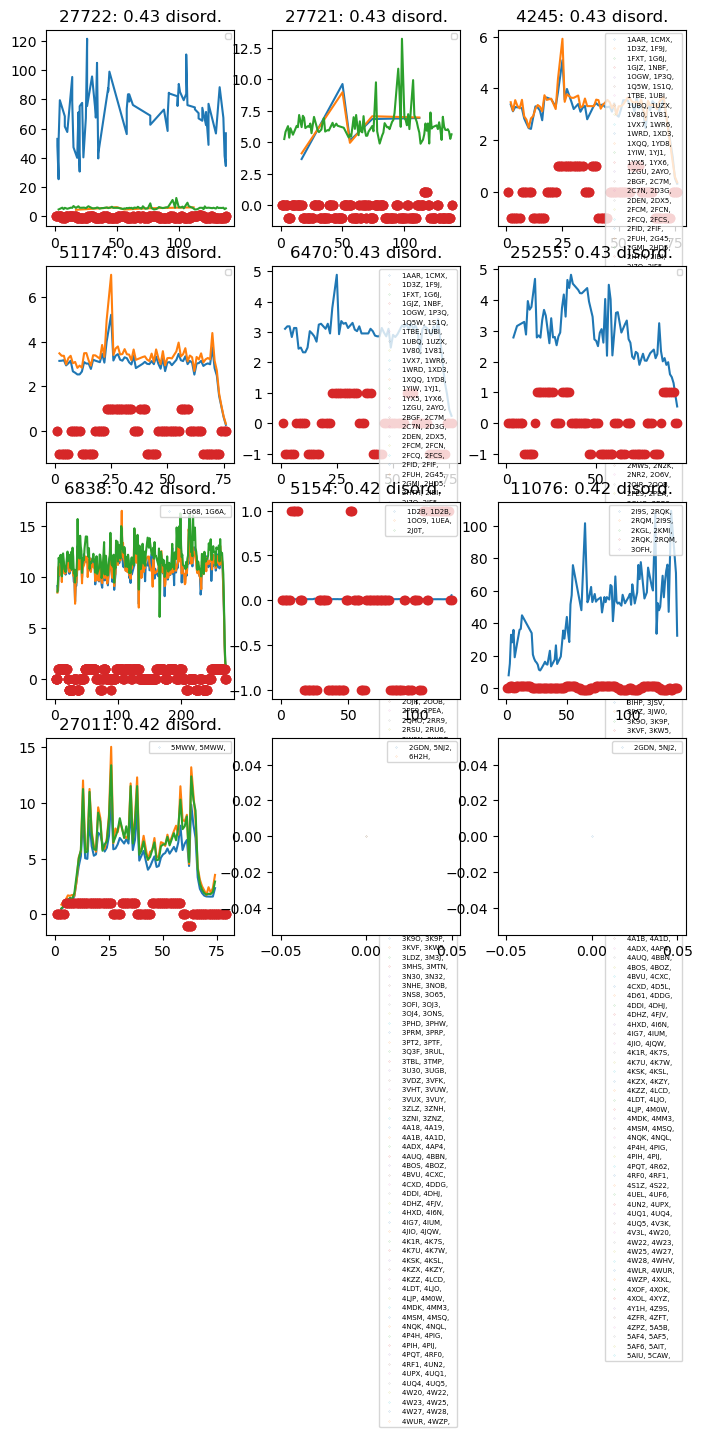

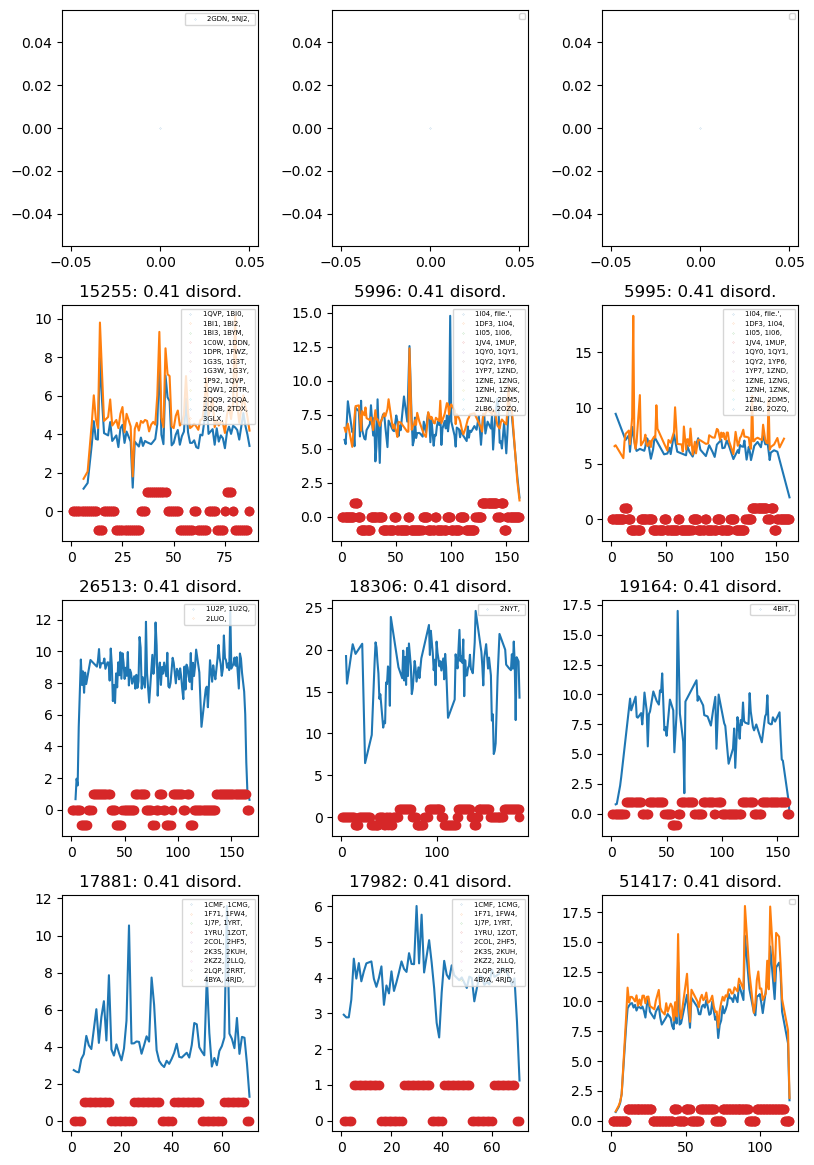

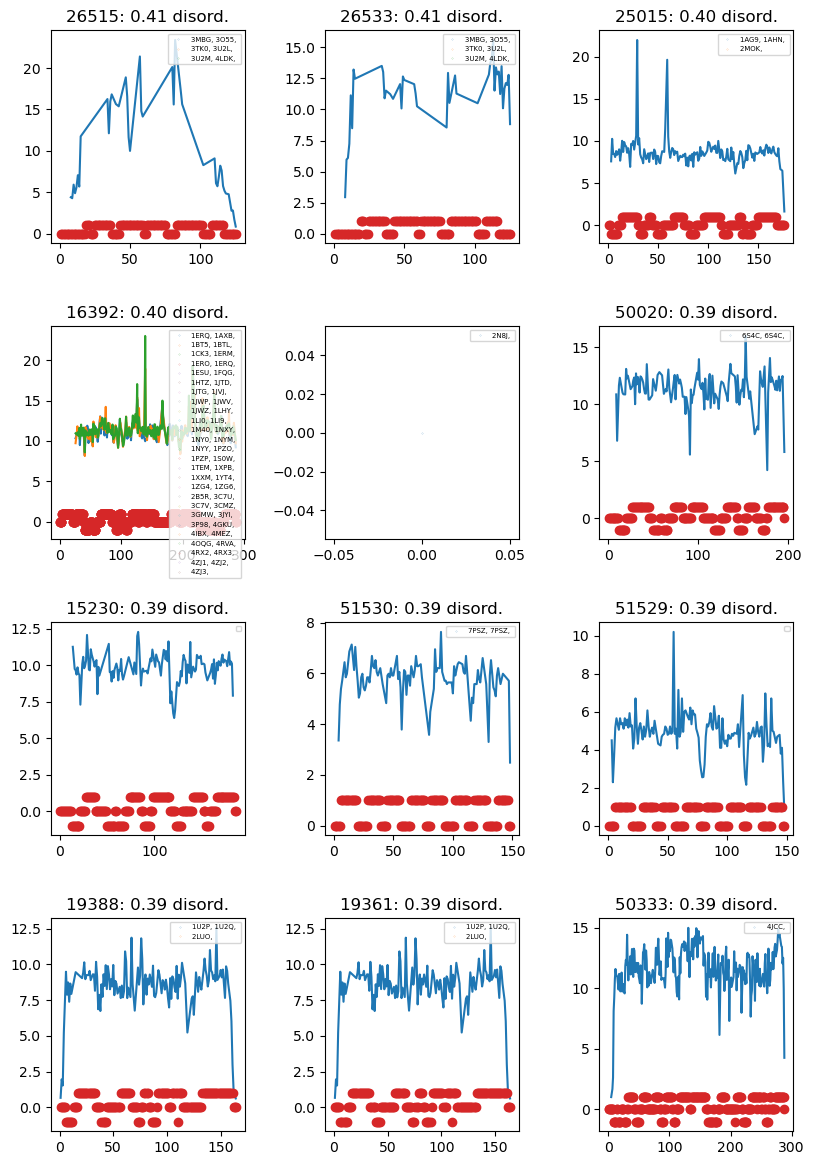

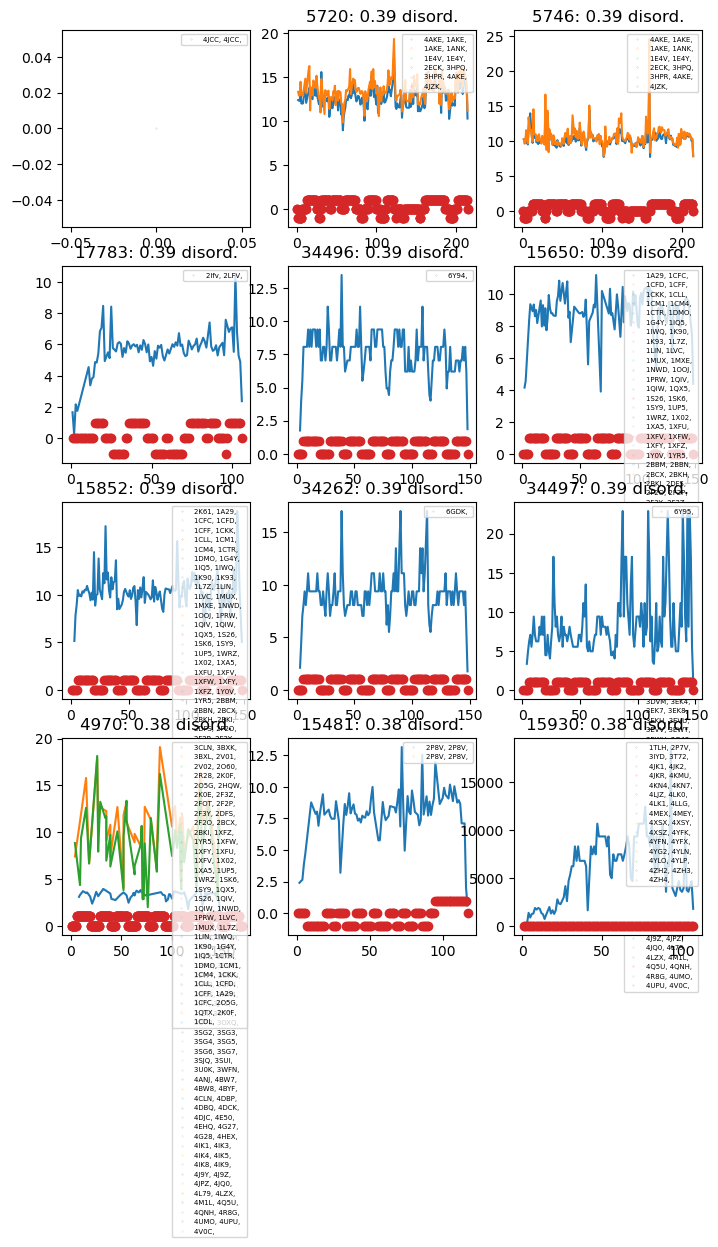

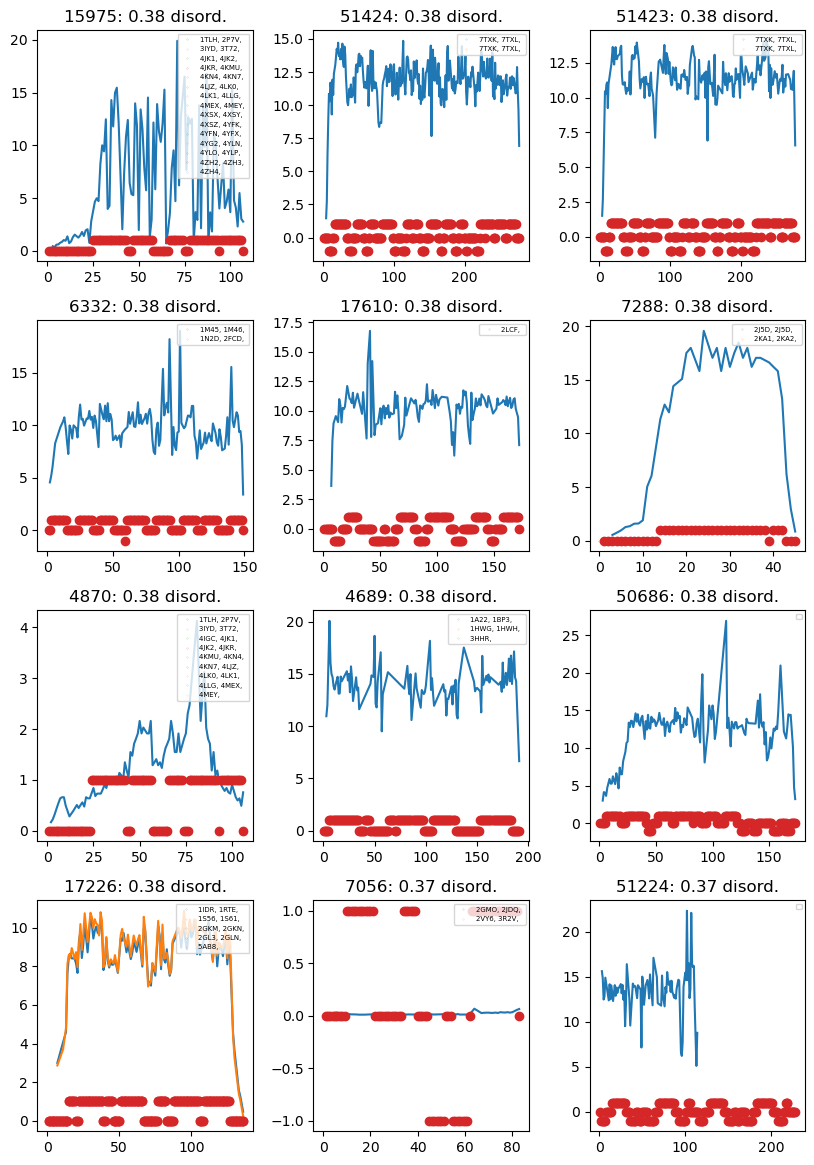

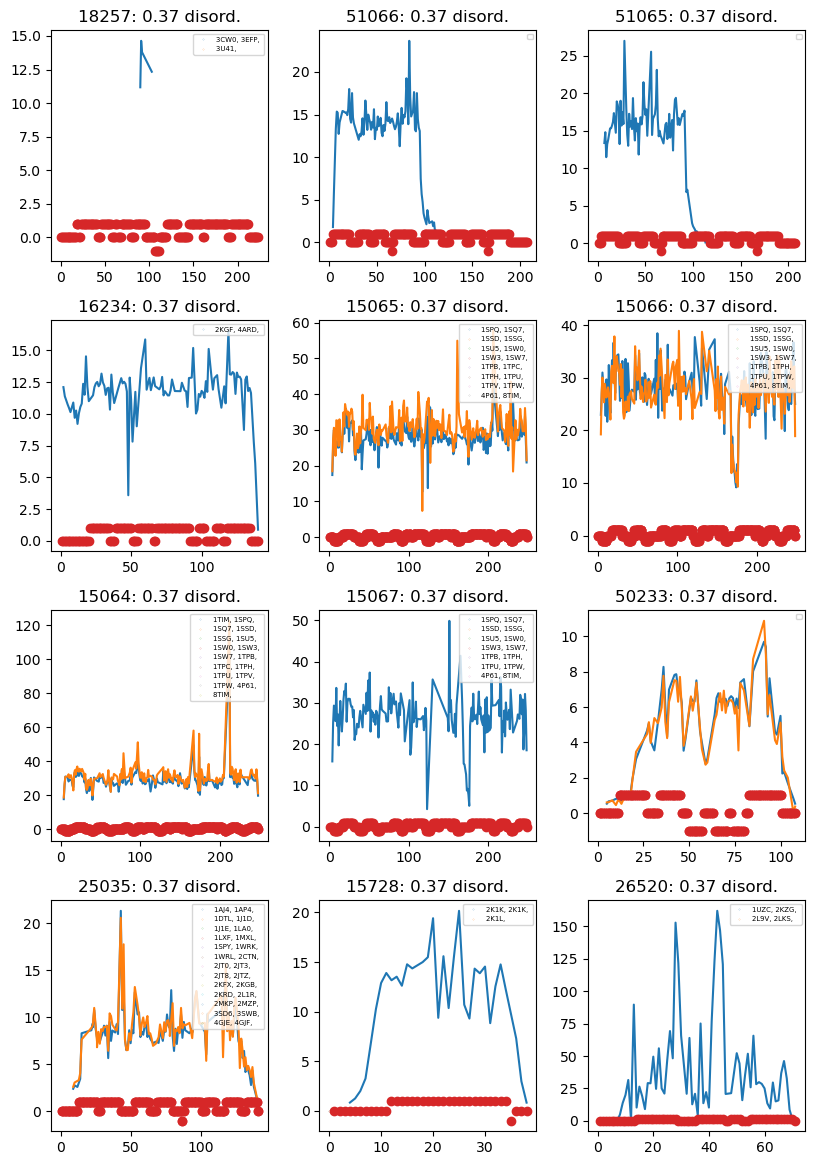

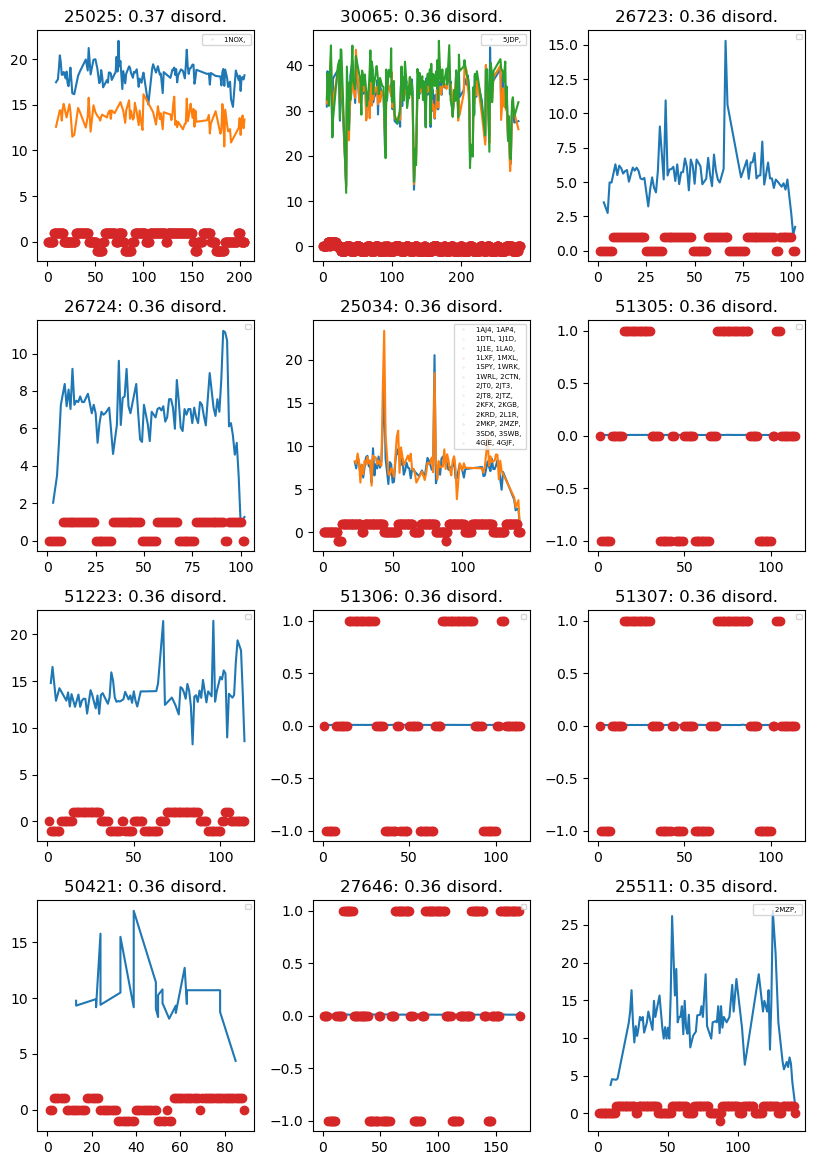

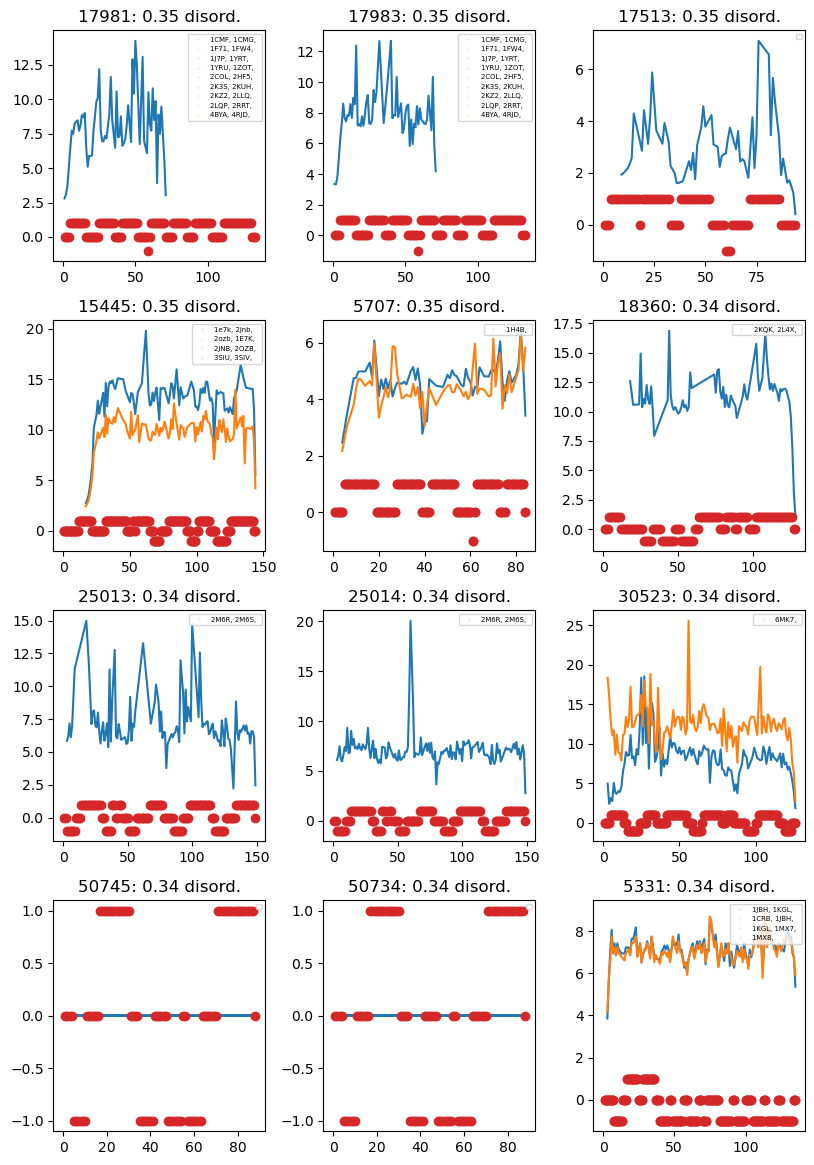

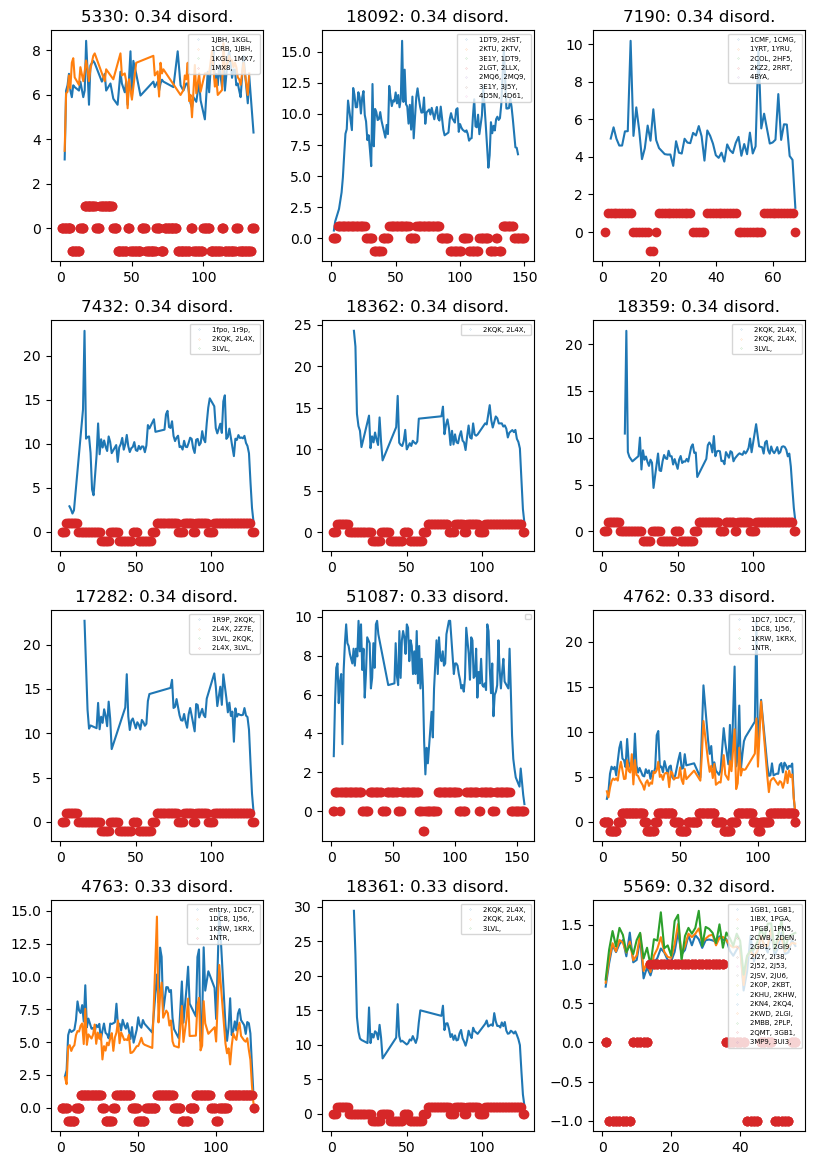

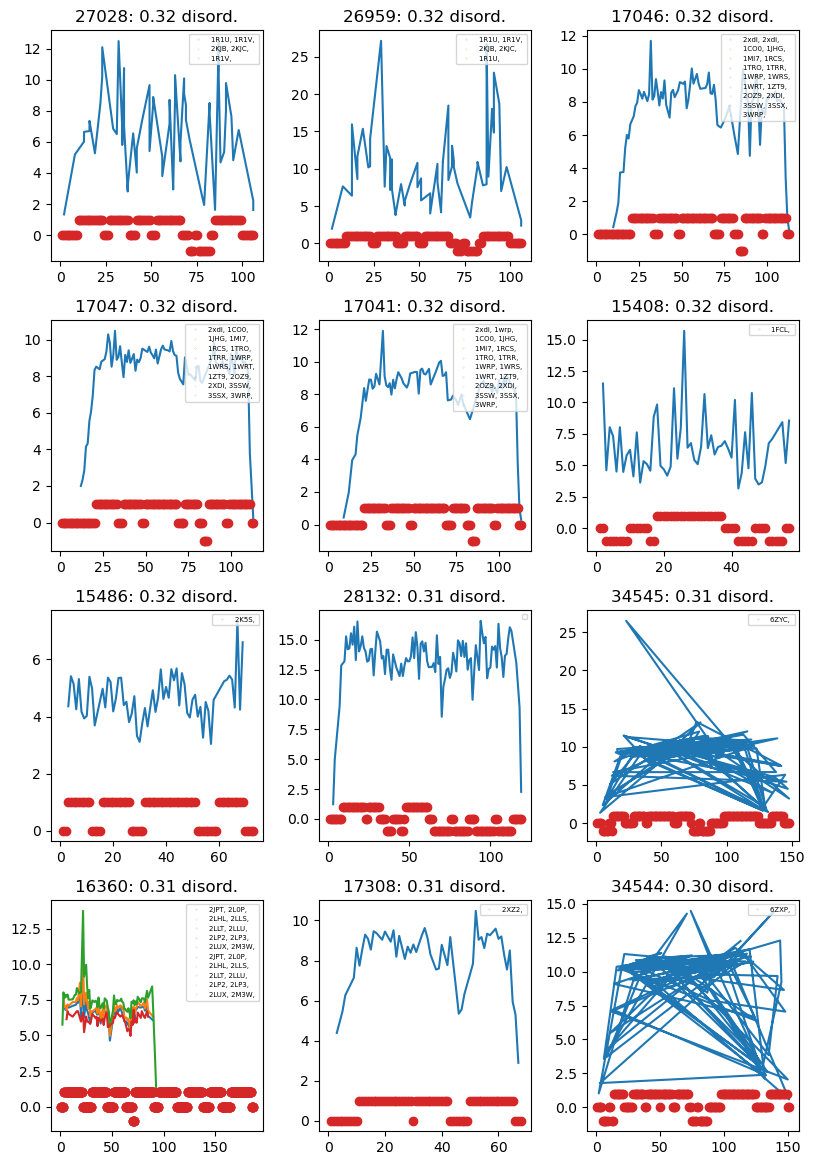

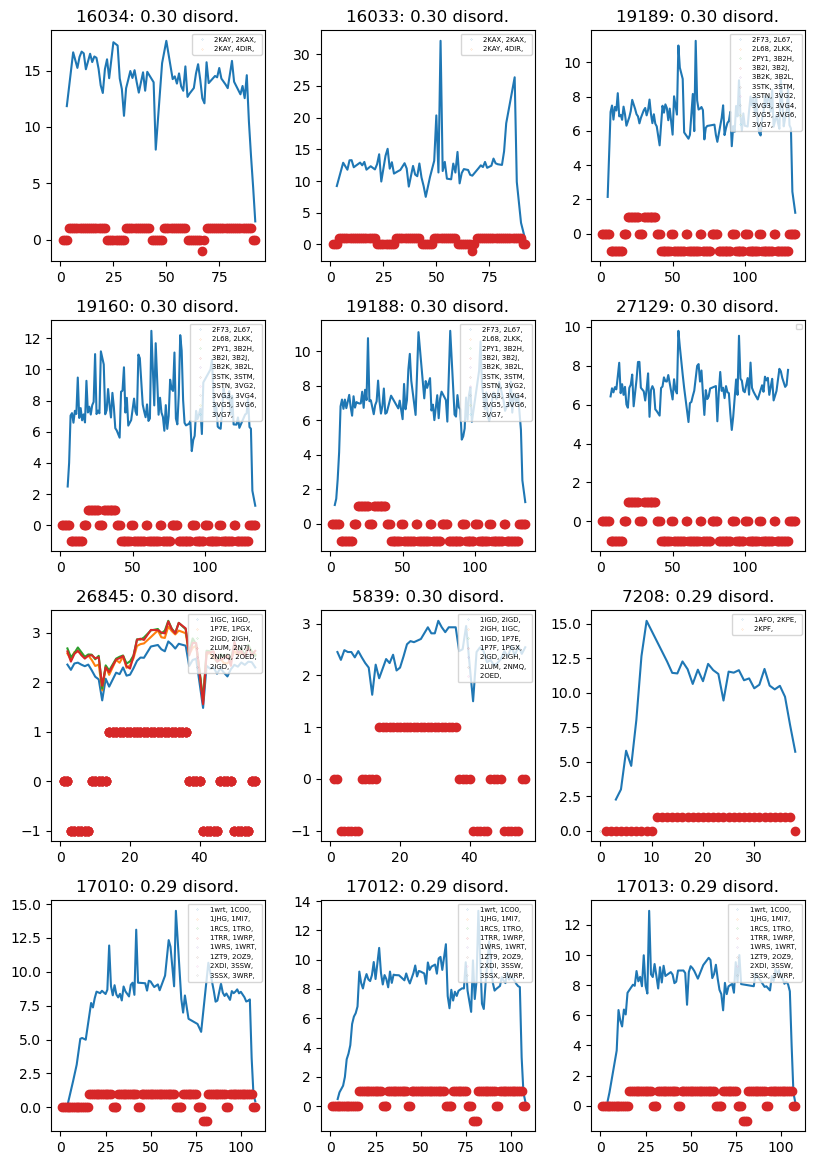

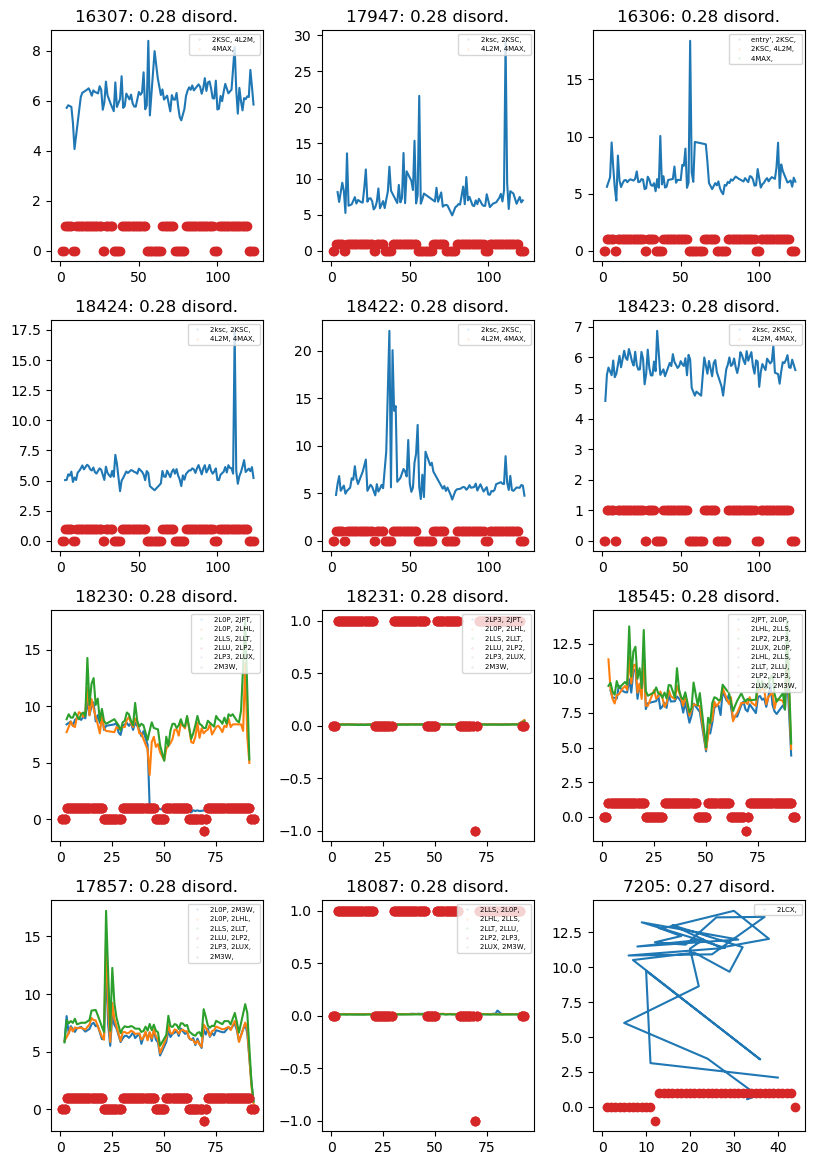

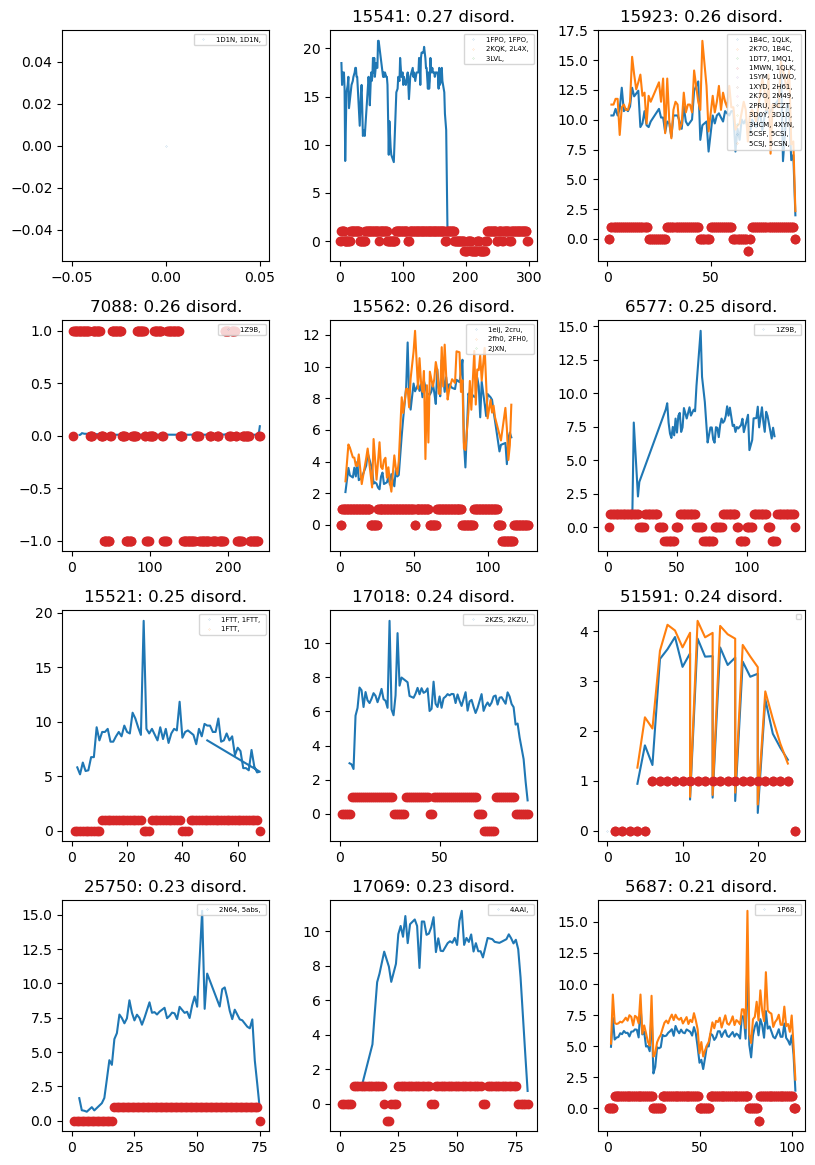

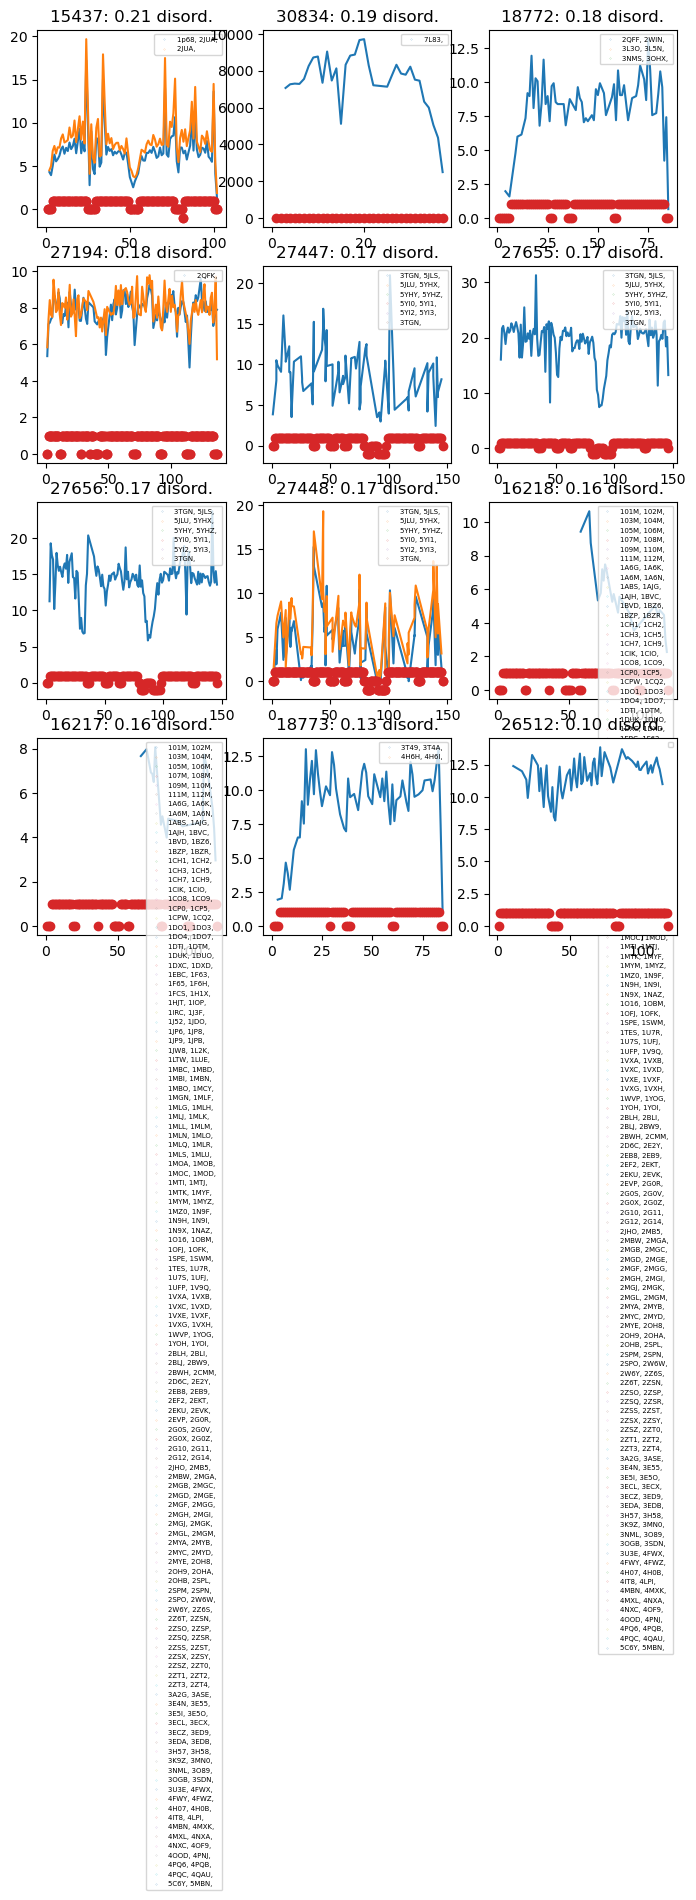

In [10]:
with PdfPages('relax_times_pssPred.pdf') as pdf:
    
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    j=0

    for entry in sorted_by_disordered:
        plot_secondary=False
        with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
            for line in f:
                if "_Entity.Polymer_type" in line:
                    if len(line.split())>1:
                        if "polypeptide" in line.split()[1]:
                            plot_secondary=True
                            
        if disordered[entry]<1.3 and plot_secondary:
            text_position=len(secondary_structure[entry]["residues"])/3*2
            with open("../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/bmr"+entry+"/bmr"+entry+"_3.str") as f:
                pdb_codes=""
                offset2=0 
                for line in f:
                    if " PDB " in line:
                        for pos,value in enumerate(line.split()):
                            if value=="PDB":
                                if len(pdb_codes)>10:
                                    axs[int(j/3),np.mod(j,3)].plot(0,0,"o",markersize=0.1, label=pdb_codes)
                                    pdb_codes=""
                                    offset2+=1
                                pdb_codes+=(line.split()[pos+1])+", "

                        color="C3"

            axs[int(j/3),np.mod(j,3)].plot(0,0,"o",markersize=0.1, label=pdb_codes)
            axs[int(j/3),np.mod(j,3)].legend(loc=1,prop={"size":5})
            
            i=0
            for field in experiments[entry]:
                try:
                    effTimes=[]
                    for R2 in experiments[entry][field]["results"]["R2"]:
                        effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                    residues=np.linspace(1,len(experiments[entry][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))

                    axs[int(j/3),np.mod(j,3)].plot(experiments[entry][field]["results"]["atomID"],np.array(effTimes)*10**9,"-",c="C"+str(i))
                    axs[int(j/3),np.mod(j,3)].plot(secondary_structure[entry]["residues"],secondary_structure[entry]["codes"],"o",c="C3")
                    axs[int(j/3),np.mod(j,3)].set_title(f"{entry}: {disordered[entry]:.2f} disord.")
                    i+=1
                except Exception as e:
                    pass
            j+=1
        if (j%12==0 and j!=0):
            j=0
            pdf.savefig()  # saves the current figure into a pdf page
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig()         
    plt.close()